In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from other_funcs import *

In [2]:
df = pd.read_csv('predictions/predicted_gw28_simple.csv')
df_sorted = df.sort_values('predicted_points_adj', ascending=False)
fixture_difficulty = pd.read_csv('fixture_difficulty/fixture_difficulty_gw28.csv')

In [3]:
df_sorted.query('owner==88376.0')

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
779,viktor_gyokeres,FWD,Arsenal,5.550686,7.878949,1.419455,88376.0
213,emiliano_martinez_romero,GK,Aston Villa,3.740397,7.774912,2.078632,88376.0
223,erling_haaland,FWD,Man City,6.374008,6.653822,1.043899,88376.0
151,crysencio_summerville,MID,West Ham,5.081283,5.729454,1.127561,88376.0
186,diogo_dalot_teixeira,DEF,Man Utd,3.661732,5.507106,1.503962,88376.0
539,matheus_santos_carneiro_da_cunha,MID,Man Utd,4.129858,5.350686,1.295610,88376.0
335,james_hill,DEF,Bournemouth,3.638873,4.831411,1.327722,88376.0
399,jordan_pickford,GK,Everton,3.223991,4.699862,1.457778,88376.0
530,martin_zubimendi_ibanez,MID,Arsenal,3.764880,4.282780,1.137561,88376.0
715,sepp_van_den_berg,DEF,Brentford,3.020848,4.175136,1.382107,88376.0


In [4]:
owner_dict = get_owner_dict()
df_sorted['owner'] = df_sorted['owner'].map(owner_dict)
df_sorted['owner'] = df_sorted['owner'].fillna('no_owner')

In [5]:
transfer_df = df_sorted.query('owner in ["no_owner", "Doug"]')

In [6]:
transfer_df.query('position=="GK"').sort_values(['owner', 'predicted_points_adj'], ascending=[True, False]).head(20)

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
213,emiliano_martinez_romero,GK,Aston Villa,3.740397,7.774912,2.078632,Doug
399,jordan_pickford,GK,Everton,3.223991,4.699862,1.457778,Doug
75,bart_verbruggen,GK,Brighton,3.564928,4.680110,1.312821,no_owner
403,jose_malheiro_de_sa,GK,Wolves,3.659329,4.626253,1.264235,no_owner
499,mads_hermansen,GK,West Ham,3.201093,3.659643,1.143248,no_owner
527,martin_dubravka,GK,Burnley,3.089194,3.334570,1.079430,no_owner
726,stefan_ortega_moreno,GK,Nott'm Forest,2.697566,2.822553,1.046333,no_owner
597,nick_pope,GK,Newcastle,3.132346,2.732905,0.872479,no_owner
426,karl_darlow,GK,Leeds,3.244788,2.307405,0.711111,no_owner
272,guglielmo_vicario,GK,Spurs,3.113153,1.827802,0.587123,no_owner


In [7]:
transfer_df.query('position=="DEF"').sort_values(['owner', 'predicted_points_adj'], ascending=[True, False]).head(20)

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
186,diogo_dalot_teixeira,DEF,Man Utd,3.661732,5.507106,1.503962,Doug
335,james_hill,DEF,Bournemouth,3.638873,4.831411,1.327722,Doug
715,sepp_van_den_berg,DEF,Brentford,3.020848,4.175136,1.382107,Doug
601,nico_o'reilly,DEF,Man City,3.726737,3.869300,1.038254,Doug
612,nordi_mukiele,DEF,Sunderland,2.764649,1.859135,0.672467,Doug
496,luke_shaw,DEF,Man Utd,3.060235,4.602477,1.503962,no_owner
15,adrien_truffert,DEF,Bournemouth,3.230972,4.289833,1.327722,no_owner
24,alex_jimenez_sanchez,DEF,Bournemouth,3.038951,4.034882,1.327722,no_owner
473,lisandro_martinez,DEF,Man Utd,2.544355,3.826613,1.503962,no_owner
572,milos_kerkez,DEF,Liverpool,2.640052,3.733313,1.414106,no_owner


In [8]:
transfer_df.query('position=="MID"').sort_values(['owner', 'predicted_points_adj'], ascending=[True, False]).head(20)

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
151,crysencio_summerville,MID,West Ham,5.081283,5.729454,1.127561,Doug
539,matheus_santos_carneiro_da_cunha,MID,Man Utd,4.129858,5.350686,1.295610,Doug
530,martin_zubimendi_ibanez,MID,Arsenal,3.764880,4.282780,1.137561,Doug
144,cody_gakpo,MID,Liverpool,4.138177,3.909873,0.944830,Doug
193,dominik_szoboszlai,MID,Liverpool,3.920003,3.703736,0.944830,Doug
28,alex_scott,MID,Bournemouth,4.284908,5.356321,1.250043,no_owner
90,bernardo_mota_veiga_de_carvalho_e_silva,MID,Man City,4.041635,4.903786,1.213317,no_owner
23,alex_iwobi,MID,Fulham,4.267878,4.864206,1.139725,no_owner
38,amad_diallo,MID,Man Utd,3.739854,4.845392,1.295610,no_owner
540,mathias_jensen,MID,Brentford,3.606305,4.670937,1.295214,no_owner


In [9]:
transfer_df.query('position=="FWD"').sort_values(['owner', 'predicted_points_adj'], ascending=[True, False]).head(20)

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
779,viktor_gyokeres,FWD,Arsenal,5.550686,7.878949,1.419455,Doug
223,erling_haaland,FWD,Man City,6.374008,6.653822,1.043899,Doug
417,junior_kroupi,FWD,Bournemouth,3.306123,3.210458,0.971064,Doug
740,thierno_barry,FWD,Everton,3.397282,3.855167,1.134780,no_owner
805,yoane_wissa,FWD,Newcastle,1.964706,3.676482,1.871264,no_owner
471,liam_delap,FWD,Chelsea,2.214716,3.562179,1.608413,no_owner
650,randal_kolo_muani,FWD,Spurs,2.881298,3.093708,1.073720,no_owner
424,kai_havertz,FWD,Arsenal,2.057189,2.920087,1.419455,no_owner
256,gabriel_fernando_de_jesus,FWD,Arsenal,1.965925,2.790542,1.419455,no_owner
677,rodrigo_muniz_carvalho,FWD,Fulham,1.500597,2.723064,1.814654,no_owner


In [10]:
df_sorted.query('position=="GK"').head(50)

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
213,emiliano_martinez_romero,GK,Aston Villa,3.740397,7.774912,2.078632,Doug
119,caoimhin_kelleher,GK,Brentford,3.607800,5.249502,1.455043,Dave
195,dorde_petrovic,GK,Bournemouth,4.040403,4.972803,1.230769,Will
399,jordan_pickford,GK,Everton,3.223991,4.699862,1.457778,Doug
75,bart_verbruggen,GK,Brighton,3.564928,4.680110,1.312821,no_owner
403,jose_malheiro_de_sa,GK,Wolves,3.659329,4.626253,1.264235,no_owner
714,senne_lammens,GK,Man Utd,3.838795,4.556683,1.187009,Rory
34,alisson_becker,GK,Liverpool,3.875902,4.522989,1.166952,Will
266,gianluigi_donnarumma,GK,Man City,3.793534,4.046437,1.066667,Lucas
499,mads_hermansen,GK,West Ham,3.201093,3.659643,1.143248,no_owner


In [11]:
df_sorted.query('position=="DEF"').head(50)

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
780,virgil_van_dijk,DEF,Liverpool,3.897176,5.511020,1.414106,Marcus
186,diogo_dalot_teixeira,DEF,Man Utd,3.661732,5.507106,1.503962,Doug
299,ibrahima_konate,DEF,Liverpool,3.664938,5.182610,1.414106,Rory
335,james_hill,DEF,Bournemouth,3.638873,4.831411,1.327722,Doug
496,luke_shaw,DEF,Man Utd,3.060235,4.602477,1.503962,no_owner
287,harry_maguire,DEF,Man Utd,3.026766,4.552141,1.503962,Dave
15,adrien_truffert,DEF,Bournemouth,3.230972,4.289833,1.327722,no_owner
516,marcos_senesi_baron,DEF,Bournemouth,3.215363,4.269108,1.327722,Lucas
715,sepp_van_den_berg,DEF,Brentford,3.020848,4.175136,1.382107,Doug
24,alex_jimenez_sanchez,DEF,Bournemouth,3.038951,4.034882,1.327722,no_owner


In [12]:
df_sorted.query('position=="MID"').head(50)

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
105,bruno_borges_fernandes,MID,Man Utd,5.919496,7.669359,1.295610,Will
108,bryan_mbeumo,MID,Man Utd,5.215453,6.757194,1.295610,Marcus
56,antoine_semenyo,MID,Man City,5.335986,6.474245,1.213317,Will
123,carlos_henrique_casimiro,MID,Man Utd,4.548897,5.893597,1.295610,Rory
576,mohamed_salah,MID,Liverpool,6.106453,5.769560,0.944830,Marcus
151,crysencio_summerville,MID,West Ham,5.081283,5.729454,1.127561,Doug
158,dango_ouattara,MID,Brentford,4.274440,5.536313,1.295214,Dave
145,cole_palmer,MID,Chelsea,6.685743,5.411749,0.809446,Rory
41,amine_adli,MID,Bournemouth,4.319021,5.398963,1.250043,Will
177,declan_rice,MID,Arsenal,4.710144,5.358075,1.137561,Rory


In [13]:
df_sorted.query('position=="FWD"').head(50)

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
375,joao_pedro_junqueira_de_jesus,FWD,Chelsea,5.218130,8.392910,1.608413,Will
779,viktor_gyokeres,FWD,Arsenal,5.550686,7.878949,1.419455,Doug
652,raul_jimenez_rodriguez,FWD,Fulham,4.237203,7.689059,1.814654,Lucas
87,benjamin_sesko,FWD,Man Utd,3.350254,7.179827,2.143069,Dave
223,erling_haaland,FWD,Man City,6.374008,6.653822,1.043899,Doug
294,hugo_ekitike,FWD,Liverpool,4.845789,4.771671,0.984705,Dave
303,igor_thiago_nascimento_rodrigues,FWD,Brentford,4.293623,4.605043,1.072531,Marcus
192,dominic_solanke_mitchell,FWD,Spurs,4.185737,4.494312,1.073720,Will
598,nick_woltemade,FWD,Newcastle,2.174436,4.068943,1.871264,Marcus
740,thierno_barry,FWD,Everton,3.397282,3.855167,1.134780,no_owner


In [14]:
a, b = get_best_11(df_sorted)
b

,full_name,position,team,predicted_points,predicted_points_adj,fixture_diff_index,owner
8,joao_pedro_junqueira_de_jesus,FWD,Chelsea,5.218130,8.392910,1.608413,Will
9,viktor_gyokeres,FWD,Arsenal,5.550686,7.878949,1.419455,Doug
0,emiliano_martinez_romero,GK,Aston Villa,3.740397,7.774912,2.078632,Doug
10,raul_jimenez_rodriguez,FWD,Fulham,4.237203,7.689059,1.814654,Lucas
4,bruno_borges_fernandes,MID,Man Utd,5.919496,7.669359,1.295610,Will
5,bryan_mbeumo,MID,Man Utd,5.215453,6.757194,1.295610,Marcus
6,antoine_semenyo,MID,Man City,5.335986,6.474245,1.213317,Will
7,carlos_henrique_casimiro,MID,Man Utd,4.548897,5.893597,1.295610,Rory
1,virgil_van_dijk,DEF,Liverpool,3.897176,5.511020,1.414106,Marcus
2,diogo_dalot_teixeira,DEF,Man Utd,3.661732,5.507106,1.503962,Doug


# Drawing fixture difficulty plots

In [15]:
def plot_points_scored_conceded_strip(fixture_difficulty_pos, pos):
    fixture_difficulty_pos = fixture_difficulty.sort_values(f'fixture_diff_{pos}_multiplier')[['team', f'avg_points_conceded_{pos}_opponent', f'avg_points_scored_{pos}']]
    fixture_difficulty_pos_melt = fixture_difficulty_pos.melt(id_vars='team', var_name='points_type', value_name='points')
    sns.stripplot(data=fixture_difficulty_pos_melt, x='team', y='points', hue='points_type')
    plt.xticks(rotation=90)

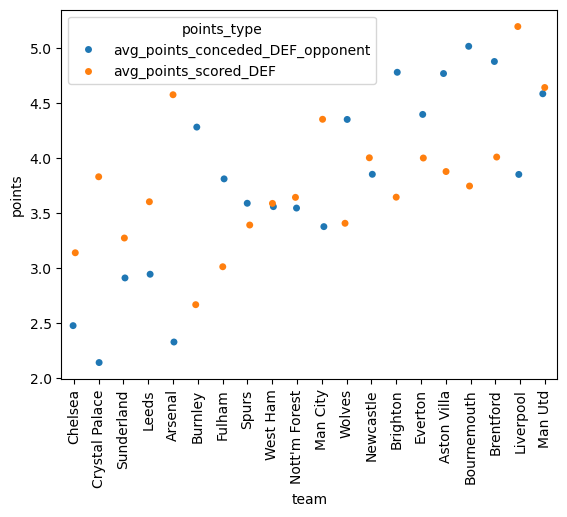

In [16]:
plot_points_scored_conceded_strip(fixture_difficulty, 'DEF')

In [17]:
sns.stripplot(data=fixture_difficulty_pos_melt, x='team', y='points', hue='points_type')
plt.xticks(rotation=90)

NameError: name 'fixture_difficulty_pos_melt' is not defined

# Random stuff

<Axes: xlabel='predicted_points', ylabel='Density'>

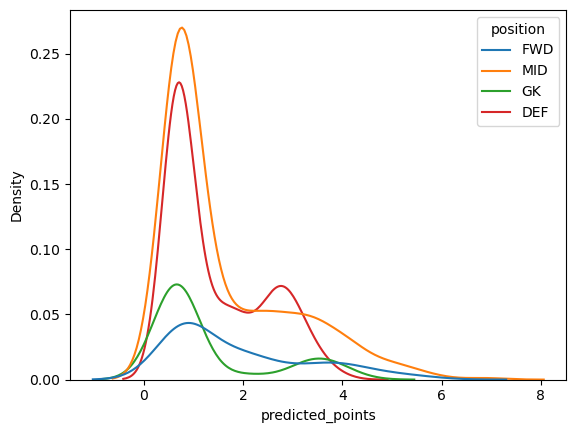

In [ ]:
sns.kdeplot(data=df_sorted, x='predicted_points', hue='position')

In [ ]:
check_pred_vs_avg = df_sorted.melt(id_vars=['full_name', 'position'], value_vars=['predicted_points', 'ewma_total_points'])
sns.kdeplot(data=check_pred_vs_avg.query('position=="DEF"'), x='value', hue='variable')

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['ewma_total_points']"

In [ ]:
a, b, = get_best_11(df_sorted)
b

,full_name,position,team,ewma_total_points,predicted_points,owner
4,mohamed_salah,MID,Liverpool,2.041024,6.888606,Marcus
5,bruno_borges_fernandes,MID,Man Utd,3.391213,5.938316,Will
9,erling_haaland,FWD,Man City,2.641108,5.666306,Doug
6,cole_palmer,MID,Chelsea,4.441361,5.649741,Rory
7,morgan_rogers,MID,Aston Villa,2.641108,5.429533,Marcus
8,antoine_semenyo,MID,Man City,3.991298,5.393788,Will
10,joao_pedro_junqueira_de_jesus,FWD,Chelsea,5.341487,5.375707,Will
0,emiliano_martinez_romero,GK,Aston Villa,3.241192,4.054268,Doug
1,gabriel_dos_santos_magalhaes,DEF,Arsenal,2.491087,3.994029,Will
2,virgil_van_dijk,DEF,Liverpool,3.841277,3.775725,Marcus


In [ ]:
owner_dict = get_owner_dict()
b['owner'] = b['owner'].map(owner_dict)

In [ ]:
a, b = get_best_11(df_sorted.query('owner=="Doug"'))
b['predicted_points'].sum()

np.float64(46.84034219578873)

In [ ]:
lucas_picked = df_sorted.query('owner=="Lucas" and full_name not in ["gianluigi_donnarumma", "mohammed_kudus", "riccardo_calafiori", "raul_jimenez_rodriguez"]')
lucas_picked['predicted_points'].sum()

np.float64(68.00468988275098)

In [ ]:
nico = "nico_o'reilly"
doug_picked = df_sorted.query('owner=="Doug" and full_name not in ["bart_verbruggen", @nico, "pedro_lomba_neto", "alexander_isak"]')
doug_picked['predicted_points'].sum()

np.float64(64.48067454125811)

In [ ]:
lw_results = pd.DataFrame({'User': ['Doug', 'Lucas', 'Will', 'Marcus', 'Dave', 'Rory'],
              'Predicted points': pred_points,
              'Actual points': [33, 13, 39, 36, 30, 42]}, 
              )

NameError: name 'pred_points' is not defined

In [ ]:
lw_results.sort_values('Actual points', ascending=False)

,User,Predicted points,Actual points
5,Rory,33.34,42
2,Will,40.75,39
3,Marcus,32.91,36
0,Doug,39.28,33
4,Dave,36.83,30
1,Lucas,36.82,13


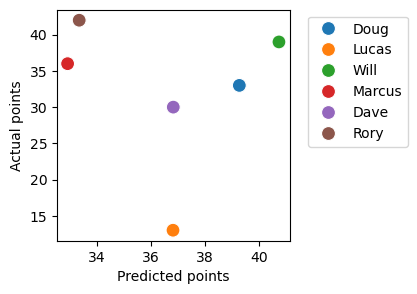

In [ ]:
plt.figure(figsize=(3,3))
ax = sns.scatterplot(data=lw_results, x='Predicted points', y='Actual points', hue='User', s=100)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Figuring out how the model did last week

In [ ]:
gw6 = pd.read_csv('predicted_gw6_simple.csv')
gw6

,full_name,position,team,ewma_total_points,predicted_points,owner
0,aaron_anselmino,DEF,Chelsea,0.0000,0.108120,NaN
1,aaron_hickey,DEF,Brentford,0.3129,0.214515,NaN
2,aaron_ramsdale,GK,Newcastle,0.0000,0.061611,NaN
3,aaron_ramsey,MID,Burnley,0.0000,0.178312,NaN
4,aaron_wan_bissaka,DEF,West Ham,0.2401,0.729524,NaN
...,...,...,...,...,...,...
736,zain_silcott_duberry,MID,Bournemouth,0.0000,0.263160,NaN
737,zak_johnson,DEF,Sunderland,0.0000,0.122112,NaN
738,zeki_amdouni,FWD,Burnley,0.0000,0.067864,NaN
739,zepiqueno_redmond,FWD,Aston Villa,0.0000,0.236978,NaN


In [ ]:
gw7 = pd.read_csv('predicted_gw7.csv')
gw6_7_merged = gw6.merge(gw7[['full_name', 'total_points']], on='full_name')

In [ ]:
import numpy as np
import scipy
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

In [ ]:
x = gw6_7_merged['predicted_points']
y = gw6_7_merged['total_points']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(r_value)

0.5529193700354283


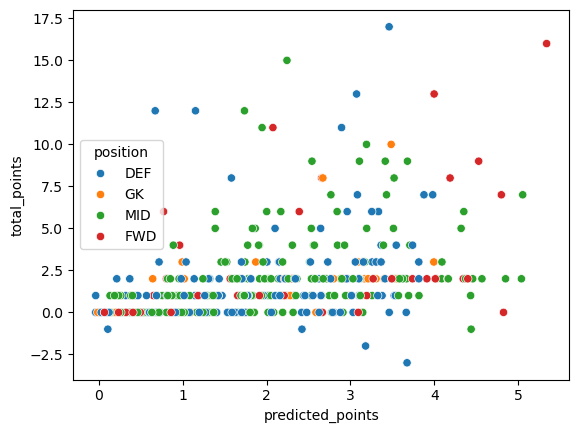

In [ ]:
sns.scatterplot(data=gw6_7_merged, x='predicted_points', y='total_points', hue='position')
x_range = np.linspace(0,6, 100)
y_range = slope*x_range + intercept
# plt.plot(x_range, y_range, color='black')

<Axes: xlabel='ewma_total_points', ylabel='total_points'>

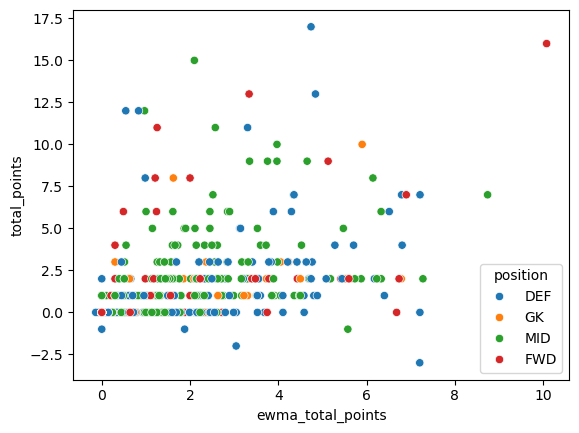

In [ ]:
sns.scatterplot(data=gw6_7_merged, x='ewma_total_points', y='total_points', hue='position')


In [ ]:
df_full = pd.read_csv('predicted_gw20.csv')

# Checking individuals def

In [ ]:
players = ['antonee_robinson', 'keane_lewis_potter', 'nordi_mukiele']

In [ ]:
player = df_full.query('full_name in @players')

In [ ]:
player_simple = player[['full_name', 'position', 'team', 'predicted_points', 'bps', 'creativity', 'ict_index', 'minutes', 'ewma_total_points', 'ewma_team_goals', 'ewma_team_points']]

In [ ]:
multiplier_df = pd.DataFrame({'feature': ['bps', 'creativity', 'ict_index', 'minutes', 'ewma_total_points', 'ewma_team_goals', 'ewma_team_points'], 'multiplier': [0.151641, 0.118134, 0.092908, 0.503033, 0.156849, 0.010896, 0.058029]})
multiplier_df = multiplier_df.set_index('feature')

In [ ]:
player_simple_multiplier = player_simple.set_index('full_name').T.merge(multiplier_df, left_index=True, right_index=True)

In [ ]:
for player_name in players:
    player_simple_multiplier[f'{player_name}_multiplied'] = player_simple_multiplier[player_name] * player_simple_multiplier['multiplier']
# player_simple_multiplier['david_brooks_multiplied'] = player_simple_multiplier['david_brooks'] * player_simple_multiplier['multiplier']
# player_simple_multiplier['morgan_rogers_multiplied'] = player_simple_multiplier['morgan_rogers'] * player_simple_multiplier['multiplier']
# player_simple_multiplier['pedro _lomba_neto_multiplied'] = player_simple_multiplier['pedro_lomba_neto'] * player_simple_multiplier['multiplier']

In [ ]:
player_simple_multiplier

,antonee_robinson,keane_lewis_potter,nordi_mukiele,multiplier,antonee_robinson_multiplied,keane_lewis_potter_multiplied,nordi_mukiele_multiplied
bps,2.651108,2.897228,2.897228,0.151641,0.402017,0.439339,0.439339
creativity,4.436192,1.110737,0.466296,0.118134,0.524065,0.131216,0.055085
ict_index,2.786776,2.421911,1.276993,0.092908,0.258914,0.225015,0.118643
minutes,1.934215,1.69509,1.934215,0.503033,0.972974,0.852686,0.972974
ewma_total_points,2.592152,4.296181,3.444167,0.156849,0.406576,0.673852,0.540214
ewma_team_goals,0.394596,0.826878,-1.334533,0.010896,0.0043,0.00901,-0.014541
ewma_team_points,1.452349,0.848977,0.245604,0.058029,0.084278,0.049265,0.014252


In [ ]:
player_simple_multiplier[['antonee_robinson_multiplied', 'keane_lewis_potter_multiplied', 'nordi_mukiele_multiplied']].sum()

antonee_robinson_multiplied      2.653124
keane_lewis_potter_multiplied    2.380382
nordi_mukiele_multiplied         2.125966
dtype: object

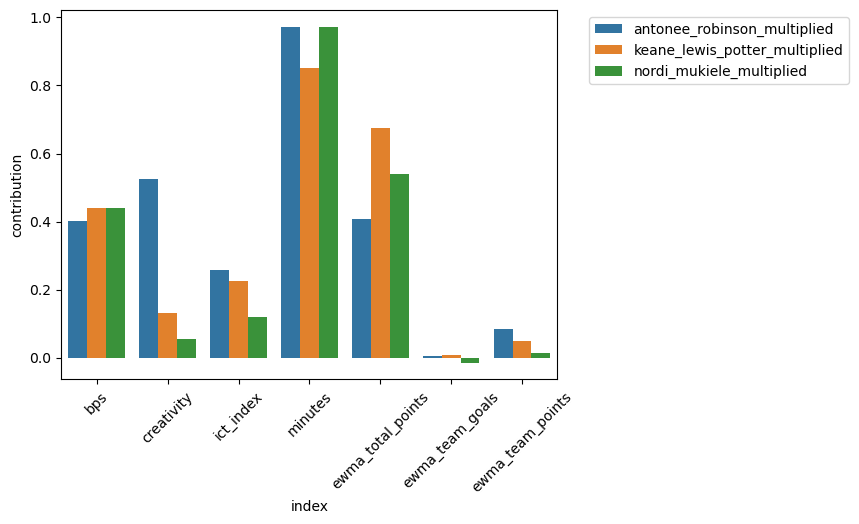

In [ ]:
plot = player_simple_multiplier.reset_index()[['index']+[f'{player_name}_multiplied' for player_name in players]].melt(var_name='player', value_name='contribution', id_vars='index')
sns.barplot(data=plot, x='index', y='contribution', hue='player')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Checking individuals mid

In [ ]:
players = ['david_brooks', 'morgan_rogers', 'pedro_lomba_neto', 'justin_kluivert', 'james_garner']

In [ ]:
player = df_full.query('full_name in @players')

In [ ]:
player_simple = player[['full_name', 'position', 'team', 'predicted_points', 'clean_sheets', 'creativity', 'threat', 'ict_index', 'minutes', 'ewma_total_points']]

In [ ]:
multiplier_df = pd.DataFrame({'feature': ['clean_sheets', 'creativity', 'threat', 'ict_index', 'minutes', 'ewma_total_points'], 'multiplier': [0.046647, 0.178292, 0.274799, 0.106039, 0.474493, 0.231377]})
multiplier_df = multiplier_df.set_index('feature')

In [ ]:
player_simple_multiplier = player_simple.set_index('full_name').T.merge(multiplier_df, left_index=True, right_index=True)

In [ ]:
for player_name in players:
    player_simple_multiplier[f'{player_name}_multiplied'] = player_simple_multiplier[player_name] * player_simple_multiplier['multiplier']
# player_simple_multiplier['david_brooks_multiplied'] = player_simple_multiplier['david_brooks'] * player_simple_multiplier['multiplier']
# player_simple_multiplier['morgan_rogers_multiplied'] = player_simple_multiplier['morgan_rogers'] * player_simple_multiplier['multiplier']
# player_simple_multiplier['pedro _lomba_neto_multiplied'] = player_simple_multiplier['pedro_lomba_neto'] * player_simple_multiplier['multiplier']

In [ ]:
player_simple_multiplier

,david_brooks,james_garner,justin_kluivert,morgan_rogers,pedro_lomba_neto,multiplier,david_brooks_multiplied,morgan_rogers_multiplied,pedro_lomba_neto_multiplied,justin_kluivert_multiplied,james_garner_multiplied
clean_sheets,0.940541,2.373397,0.940541,-0.492314,0.940541,0.046647,0.043873,-0.022965,0.043873,0.043873,0.110712
creativity,3.428586,3.595927,3.681377,1.37421,4.318697,0.178292,0.611289,0.245011,0.769989,0.65636,0.641125
threat,6.256681,0.386617,1.84545,3.37375,1.289704,0.274799,1.71933,0.927103,0.354409,0.507128,0.106242
ict_index,4.145581,2.900009,2.421911,3.352944,2.40933,0.106039,0.439593,0.355543,0.255483,0.256817,0.307514
minutes,0.708701,1.881906,1.396184,1.866961,1.597946,0.474493,0.336274,0.88586,0.758214,0.66248,0.892951
ewma_total_points,1.31413,3.444167,1.31413,3.870174,0.888122,0.231377,0.304059,0.895469,0.205491,0.304059,0.796901


In [ ]:
player_simple_multiplier.sum()


david_brooks                   16.794219
james_garner                   14.582023
justin_kluivert                11.599594
morgan_rogers                  13.345725
pedro_lomba_neto                11.44434
multiplier                      1.311647
david_brooks_multiplied         3.454419
morgan_rogers_multiplied        3.286021
pedro_lomba_neto_multiplied      2.38746
justin_kluivert_multiplied      2.430717
james_garner_multiplied         2.855445
dtype: object

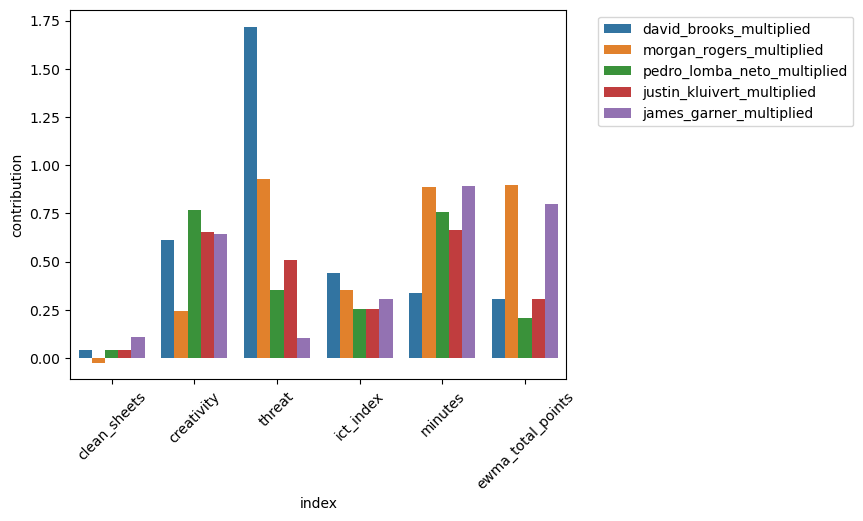

In [ ]:
plot = player_simple_multiplier.reset_index()[['index']+[f'{player_name}_multiplied' for player_name in players]].melt(var_name='player', value_name='contribution', id_vars='index')
sns.barplot(data=plot, x='index', y='contribution', hue='player')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
player_simple.set_index('full_name').T

full_name,david_brooks,morgan_rogers,pedro_lomba_neto
position,MID,MID,MID
team,Bournemouth,Aston Villa,Chelsea
predicted_points,5.010373,4.841976,3.943414
clean_sheets,0.940541,-0.492314,0.940541
creativity,3.428586,1.37421,4.318697
threat,6.256681,3.37375,1.289704
ict_index,4.145581,3.352944,2.40933
minutes,0.708701,1.866961,1.597946
ewma_total_points,1.31413,3.870174,0.888122


In [ ]:
df_full.columns

Index(['full_name', 'gw', 'total_points', 'position', 'team', 'opponent_team',
       'xP', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'expected_assists', 'expected_goal_involvements', 'expected_goals',
       'expected_goals_conceded', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'minutes', 'own_goals', 'penalties_missed',
       'penalties_saved', 'red_cards', 'saves', 'starts', 'threat',
       'ewma_total_points', 'transfers_balance', 'transfers_in',
       'transfers_out', 'value', 'yellow_cards', 'opponent_team_name',
       'ewma_team_goals', 'ewma_team_points', 'team_name_nw_opponent',
       'team_nw_opponent', 'ewma_team_goals_nw_opponent',
       'ewma_team_points_nw_opponent', 'predicted_points', 'owner'],
      dtype='object')

In [ ]:
df_sorted.query('owner=="Lucas"')

,full_name,position,team,ewma_total_points,predicted_points,owner
243,florian_wirtz,MID,Liverpool,3.098423,5.735175,Lucas
216,enzo_fernandez,MID,Chelsea,3.249533,5.177763,Lucas
429,kevin_schade,MID,Brentford,1.587318,5.094285,Lucas
345,jarrod_bowen,FWD,West Ham,2.493981,4.890191,Lucas
244,francisco_evanilson_de_lima_barbosa,FWD,Bournemouth,2.796202,4.460830,Lucas
262,gianluigi_donnarumma,GK,Man City,1.285097,3.805032,Lucas
778,william_saliba,DEF,Arsenal,1.889539,3.449347,Lucas
540,matz_sels,GK,Nott'm Forest,2.342871,3.255609,Lucas
582,neco_williams,DEF,Nott'm Forest,2.191760,3.176590,Lucas
362,jeremy_doku,MID,Man City,1.133987,2.963525,Lucas
